In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [16]:
input_ = tf.keras.layers.Input(shape = X_train.shape[1:])
normalization_layer = tf.keras.layers.Normalization()
normalized = normalization_layer(input_)
hidden1 = tf.keras.layers.Dense(32, activation = "relu")(normalized)
hidden2 = tf.keras.layers.Dense(16, activation = "relu")(hidden1)
concat = tf.keras.layers.Concatenate()([normalized, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs = [input_], outputs = [output])
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2), metrics = ["RootMeanSquaredError"])

In [17]:
tf.keras.utils.plot_model(model, "model_california_housing.png", show_shapes = True, show_layer_activations = True, show_trainable = True);

In [18]:
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30


c:\Users\natha\Documents\GitHub\Deep-Learning-with-Keras-TensorFlow-book\env\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_24']. Received: the structure of inputs=*
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - RootMeanSquaredError: 0.9245 - loss: 0.9165 - val_RootMeanSquaredError: 0.7701 - val_loss: 0.5931
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - RootMeanSquaredError: 0.6505 - loss: 0.4239 - val_RootMeanSquaredError: 2.1548 - val_loss: 4.6431
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - RootMeanSquaredError: 0.6223 - loss: 0.3879 - val_RootMeanSquaredError: 0.6950 - val_loss: 0.4830
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - RootMeanSquaredError: 0.6116 - loss: 0.3743 - val_RootMeanSquaredError: 0.6433 - val_loss: 0.4138
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - RootMeanSquaredError: 0.5859 - loss: 0.3434 - val_RootMeanSquaredError: 4.9606 - val_loss: 24.6071
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - RootMeanSquaredError: 0.6349 - loss: 0.4035 - val_RootMeanSquaredError: 11.9567 - val_loss: 142.9628
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - RootMeanSquaredError: 0.618

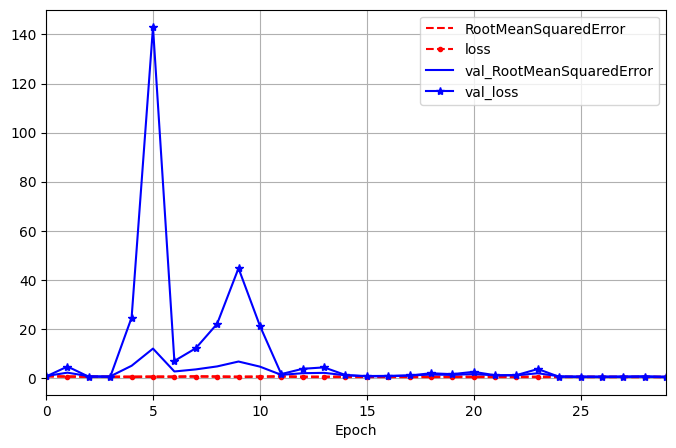

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize = (8, 5), xlim = [0, len(history.epoch) - 1], grid = True, xlabel = "Epoch", style = ["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [20]:
mse_test, rmse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - RootMeanSquaredError: 0.5323 - loss: 0.2837
